## João Victor Nascimento da Silva

# Processamento de Linguagem Natural - Análise de Sentimentos

### Descrição e Motivação do Problema

A análise de sentimentos é uma tarefa fundamental no processamento de linguagem natural (PLN), com aplicações em diversos domínios, como monitoramento de redes sociais, feedback de clientes e tomada de decisão baseada em opiniões.
### Descrição da Base de Dados

O conjunto de dados utilizado contém frases em português classificadas com sentimentos positivos, negativos ou neutros. Esses dados foram coletados da Plataforma Kaggle no link https://www.kaggle.com/datasets/gazprom/anlise-de-sentimentos-pt-br.

In [15]:
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Download dos recursos do NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')  # For stop word removal
nltk.download('wordnet')  # For lemmatization

# Carregando os dados (substitua pelo caminho do seu arquivo)
data = pd.read_csv('data/sentiment_analysis_pt_br.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joaov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\joaov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joaov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joaov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Ensure 'Sentence' is a string column (optional)
if not pd.api.types.is_string_dtype(data['Sentence']):
  data['Sentence'] = data['Sentence'].astype(str)

In [17]:
data.head()

,Sentence,Sentiment
0,A tecnologia GeoSolutions aproveitará as soluç...,positive
1,"$ Esi em baixos, queda de US $ 1,50 a US $ 2,5...",negative
2,"No último trimestre de 2010, as vendas líquida...",positive
3,De acordo com a Câmara de Comércio Finlandesa-...,neutral
4,A empresa de compra sueca vendeu sua participa...,neutral


In [18]:
data['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Função para pré-processar o texto
def preprocess(sentence):
    # Tokenização
    words = word_tokenize(sentence)
    # Remoção de stop words
    words = [word for word in words if word not in stopwords.words('portuguese')]
    # Stemming
    # stemmer = PorterStemmer()
    # words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

### Extração de Características

Para transformar os textos em uma representação numérica adequada para os algoritmos de aprendizado de máquina, será utilizada a abordagem de Bag of Words (BoW) com a classe CountVectorizer do Scikit-learn.

In [20]:
# Remoção de caracteres especiais e números
data['Sentence'] = data['Sentence'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
# Conversão para letras minúsculas
data['Sentence'] = data['Sentence'].str.lower()
# Aplicando o pré-processamento aos dados
data['text_preprocessed'] = data['Sentence'].apply(preprocess)

# Vectorização
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text_preprocessed'])
y = data['Sentiment']  # Substitua por sua coluna de sentimentos

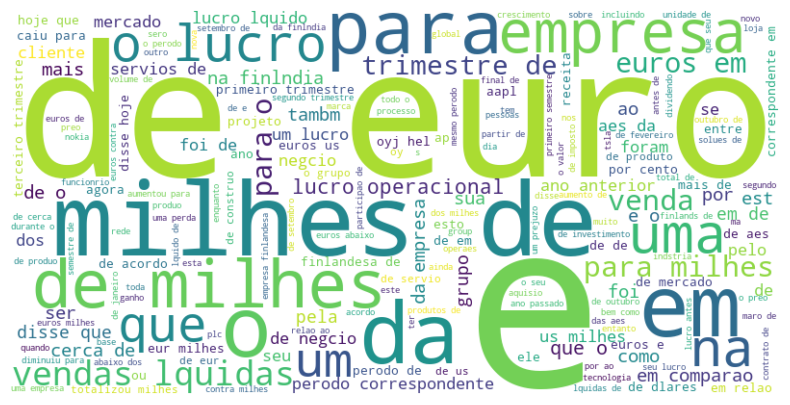

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['Sentence'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Treinamento e Avaliação do Modelo

Nesta etapa, utilizaremos o modelo Naive Bayes (MultinomialNB) para a classificação de sentimentos. O desempenho será avaliado com a métrica de acurácia.

In [22]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo (Naive Bayes como exemplo)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [23]:
# Fazendo previsões
y_pred = model.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.6852010265183918


In [24]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.37      0.33      0.35       175
     neutral       0.76      0.78      0.77       622
    positive       0.69      0.70      0.69       372

    accuracy                           0.69      1169
   macro avg       0.61      0.60      0.60      1169
weighted avg       0.68      0.69      0.68      1169



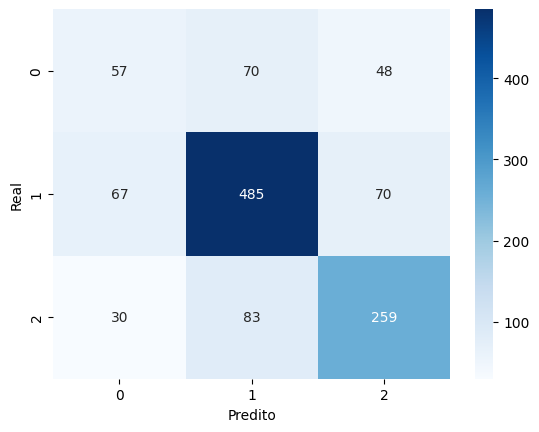

              precision    recall  f1-score   support

    negative       0.37      0.33      0.35       175
     neutral       0.76      0.78      0.77       622
    positive       0.69      0.70      0.69       372

    accuracy                           0.69      1169
   macro avg       0.61      0.60      0.60      1169
weighted avg       0.68      0.69      0.68      1169



In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Relatório de classificação
print(classification_report(y_test, y_pred))

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f"Acurácia média: {scores.mean():.2f} (+/- {scores.std():.2f})")


Acurácia média: 0.66 (+/- 0.01)


### Discussão dos Resultados

Os resultados obtidos mostram que o modelo Naive Bayes é eficiente para a tarefa de classificação de sentimentos com base no conjunto de dados utilizado.

### Trabalhos Futuros
    Experimentar outros modelos de aprendizado de máquina, como SVM ou Redes Neurais.
    Ampliar o conjunto de dados com mais frases para melhorar a robustez do modelo.
    Implementar técnicas de Word Embeddings, como Word2Vec ou BERT, para capturar melhor o contexto semântico.